In [25]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
import umap.umap_ as umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



In [48]:
def dim_red(mat, p):
    
    umap_model = umap.UMAP(random_state=42, n_components=p)

    red_mat = umap_model.fit_transform(mat)
    
    return red_mat

In [49]:
def clust(mat, k):
    
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(mat)
    pred = kmeans.labels_

    return pred

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

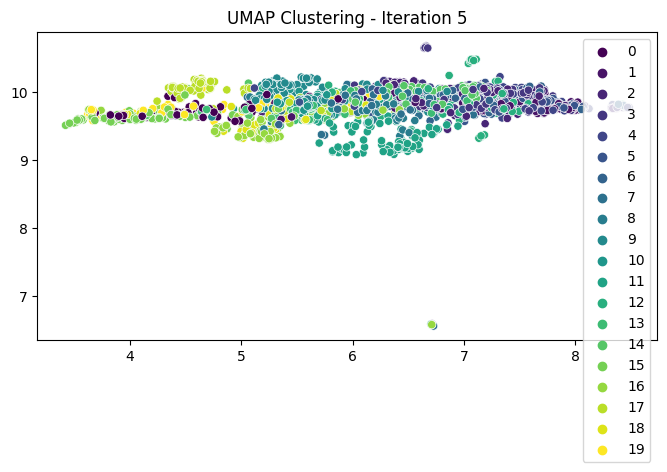

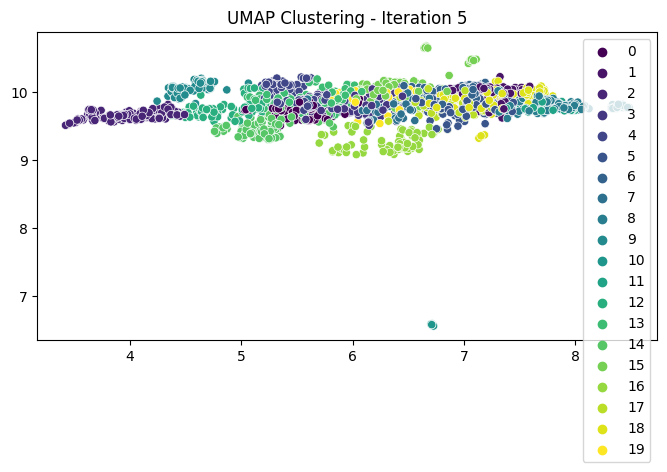

Average NMI on 5: 0.47
Average ARI on 5: 0.29


In [50]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

num_iterations=5
nmi_scores = []
ari_scores = []
# perform dimentionality reduction
for _ in range(num_iterations):
    # perform dimentionality reduction
    red_emb = dim_red(model.encode(corpus), 20)

    # perform clustering
    pred = clust(red_emb, k)

    # evaluate clustering results
    nmi_score = normalized_mutual_info_score(pred, labels)
    ari_score = adjusted_rand_score(pred, labels)

    nmi_scores.append(nmi_score)
    ari_scores.append(ari_score)

    if _ == num_iterations - 1:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=red_emb[:, 0], y=red_emb[:, 1], hue=labels, palette='viridis', legend='full')
        plt.title(f'UMAP Clustering - Iteration {_ + 1}')
        plt.show()
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=red_emb[:, 0], y=red_emb[:, 1], hue=pred, palette='viridis', legend='full')
        plt.title(f'UMAP Clustering - Iteration {_ + 1}')
        plt.show()
# Calculate average scores
average_nmi = sum(nmi_scores) / num_iterations
average_ari = sum(ari_scores) / num_iterations

print(f'Average NMI on {num_iterations}: {average_nmi:.2f}\nAverage ARI on {num_iterations}: {average_ari:.2f}')